In [22]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats
from scipy.spatial.distance import pdist, squareform, euclidean

import dill

rcParams['font.family'] = 'Arial'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = False

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [2]:
with open(DATAFOLDER / "bazzino_data_for_frejus.pickle", "rb") as f:
    data = dill.load(f)

x_array = data["x_array"]
snips_photo = data["snips_photo"]
snips_vel = data["snips_vel"]

In [3]:
pcafile = RESULTSFOLDER / "transformed_data_photo.pickle"

with open(pcafile, 'rb') as f:
    pca = dill.load(f)

pc1 = pca[:,0]

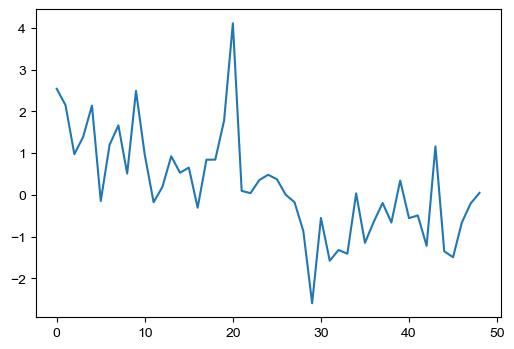

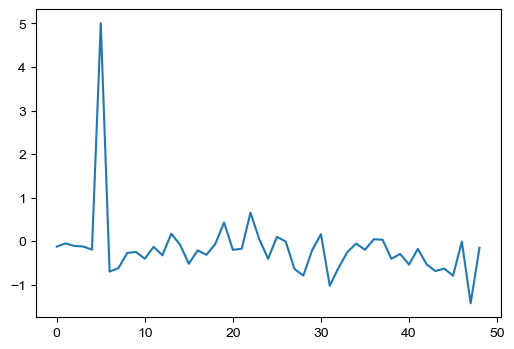

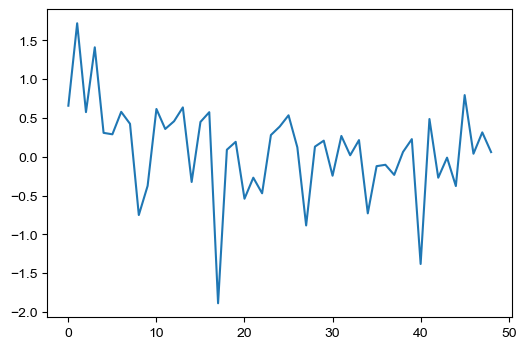

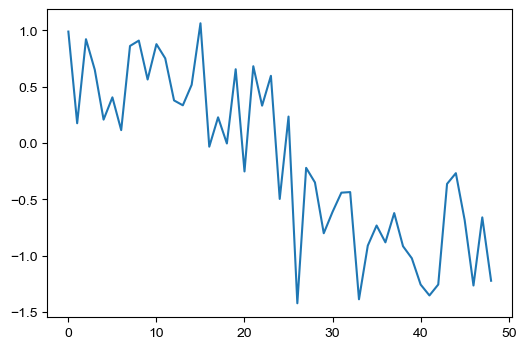

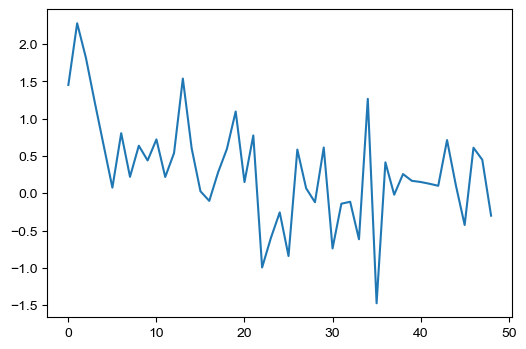

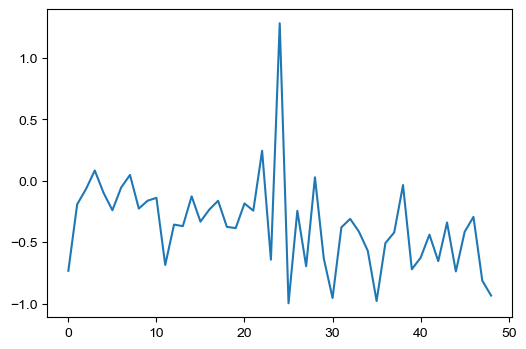

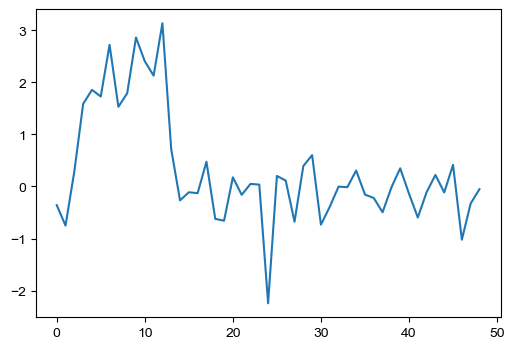

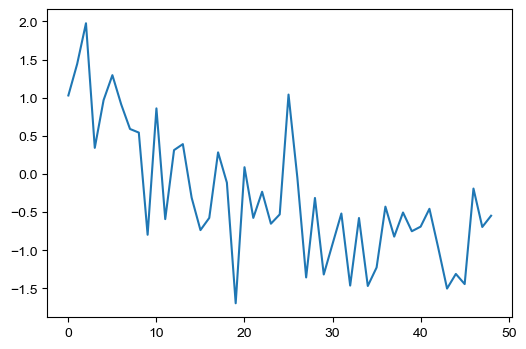

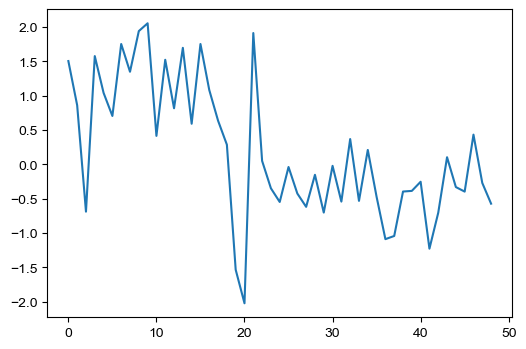

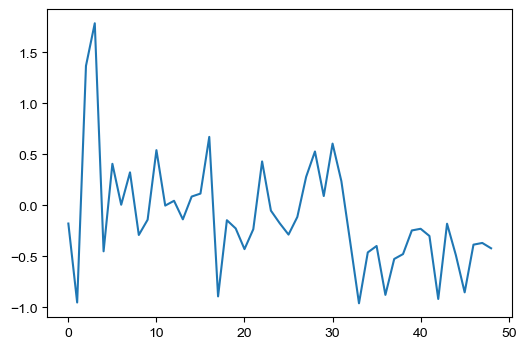

In [ ]:
# just select 0.45 and deplete Na+ condition
x_array_red = x_array.query("infusiontype == '45NaCl' & condition == 'deplete'")
rats = x_array_red.id.unique()

for rat in rats:
    x_rat = x_array_red.query("id == @rat")
    snips_photo_rat = snips_photo[x_array.query("infusiontype == '45NaCl' & condition == 'deplete' & id == @rat").index]
    snips_vel_rat = snips_vel[x_array.query("infusiontype == '45NaCl' & condition == 'deplete' & id == @rat").index]
    pc1_rat = pc1[x_array.query("infusiontype == '45NaCl' & condition == 'deplete' & id == @rat").index]

    f, ax = plt.subplots(figsize=(6,4), sharex=True)
    ax.plot(pc1_rat)

    

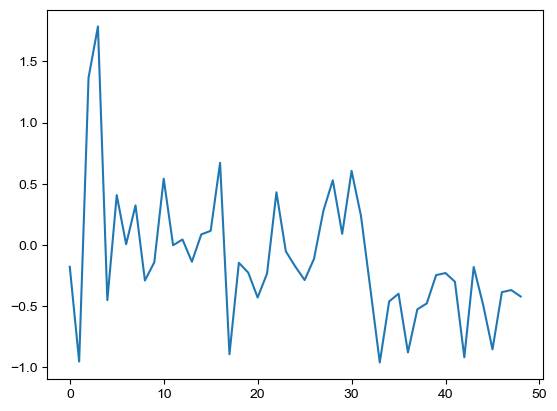

In [28]:
plt.plot(pc1_rat)

In [20]:
x_array.columns

Index(['trial', 'id', 'condition', 'infusiontype', 'cluster_photo',
       'cluster_vel', 'auc_snips', 'auc_vel'],
      dtype='object')

In [ ]:
from scipy.spatial.distance import pdist, squareform, euclidean

for rat in rats:
    pc_rat = pca[x_array.query("id == 'PB26'").index, :5]  # First 3 PCs
    
    # Pairwise distances within this rat's data
    distances_rat = pdist(pc_rat, metric='euclidean')
    distance_matrix_rat = squareform(distances_rat)

    # f, ax = plt.subplots(figsize=(6,4))
    print(distances_rat.shape)

(4753,)
(4753,)
(4753,)
(4753,)
(4753,)
(4753,)
(4753,)
(4753,)
(4753,)
(4753,)


In [ ]:
x_array.cluster_photo

0       0
1       0
2       1
3       0
4       0
       ..
1955    1
1956    1
1957    1
1958    1
1959    1
Name: cluster_photo, Length: 1960, dtype: int64

In [20]:
cluster0_mean_pc = pca[x_array.query("cluster_photo == 0").index, :5].mean(axis=0)
cluster1_mean_pc = pca[x_array.query("cluster_photo == 1").index, :5].mean(axis=0)

print(cluster0_mean_pc)
print(cluster1_mean_pc)

[ 0.82012155  0.83916941 -0.07891844  0.03875802  0.03706716]
[-0.38938804 -0.39843183  0.03746993 -0.01840204 -0.01759923]


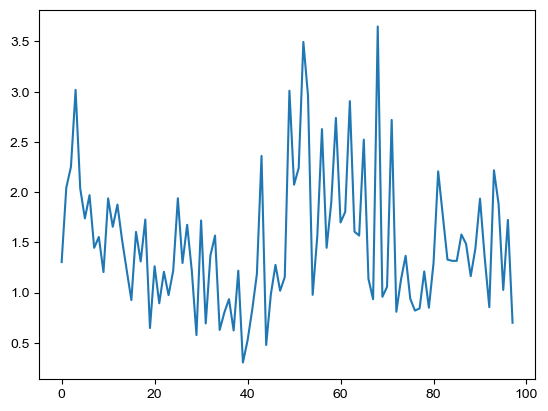

In [38]:
rat_data = pca[x_array.query("id == 'PB75'").index, :5]
trial_dist = []

for idx in range(len(rat_data)):
    dist = euclidean(cluster1_mean_pc, rat_data[idx, :])
    # print(dist)
    trial_dist.append(dist)


plt.plot(trial_dist)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(pca[:,5], x_array.cluster_photo)  # X = features, y = labels
X_lda = lda.transform(pca)  # Project to LDA space

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.14966138 -0.32168402  0.7268208  ... -0.04498285 -0.00896754
  0.39904094].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

find distance position of cluster 0 and cluster 1 in pc space
    (think about number of components, pcs to use, start low but try diff combos, or use LDA)

try with mean from all rats first and then try with mean from individual rats

